In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
#import torch
print(os.getpid())

1312723


In [2]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

## ImageAnalysis3 section:

In [3]:
import ImageAnalysis3 as ia3

In [4]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

In [5]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'/lab/weissman_imaging/puzheng/Corrections/20230902-Merscope01_s30_n500',
             'shared_parameters':{
                     'single_im_size':[30, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 1000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907
-- 17 folders, 325 fovs detected.


In [10]:
_overwrite = False

_save_images = True

_warp_image = False
_fit_spots = True


#sel_fov_ids = np.concatenate([np.arange(81, 168), np.arange(18, 20)]) # batch1+2 in mendel
sel_fov_ids = np.arange(20,40) #[114]#np.arange(0,10)
# 0-9: processed not warpped.
# 10-19: warpped

for _fov_id in sel_fov_ids:
    # 1. create fov class:
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = ia3.classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True, # whether overwrite
                                              )
    # 1.5. Process DAPI image
    fov._load_dapi_image()
    #continue
    # 2. Process image into candidate spots
    fov.parallel = True
    setattr(fov, "merfish_ref_id", 0)
    fov._process_image_to_spots('merfish', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('merfish')

    # 3. Process RNA-spots as reference
    fov.parallel = True
    setattr(fov, "rna_ref_id", 0)
    fov._process_image_to_spots('rna', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._save_to_file('rna')
    

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 748 chromatic_correction_748_637_30_2304_2304.npy
	 637 None
	 545 chromatic_correction_545_637_30_2304_2304.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 748 chromatic_correction_748_637_30_2304_2304_const.pkl
	 637 None
	 545 chromatic_correction_545_637_30_2304_2304_

-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_020.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_020.dax  in 1.397s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_020.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_020.hdf5 in 0.804s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 11.072s
-- bleedthrough correction for channels: ['748', '637', '545'] - loading merfish info from file:Conv_zscan_020.hdf5 -- drift 0: [-0.16  2.62  2.24] in 2.264s.
in 8.746s
-- illumination correction for channels: 748,  in 19.193s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.790s.
- loading merfish info from file:Conv_zscan_020.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_020.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_020.dax in 0.737s.
- loading merfish info from file:Conv_zscan_020.hdf5 637, -- ['748'

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.29  3.04  5.04] in 0.000s
637,  in 35.827s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- finish correction in 56.871s
545, -- drift 0: [-0.28  4.09  5.56] in 2.406s.
477, in 5.383s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.85  4.39  5.71] in 3.196s.
in 11.328s
-- bleedthrough correction for channels: ['748', '637', '545'] in 9.260s
-- illumination correction for channels: 748,  in 40.843s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 0: [-0.22  3.05  5.71] in 2.672s.
637, -- drift 2: [-0.25  3.82  5.64] in 3.842s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.46  4.1   5.64] in 9.508s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.46  4.1   5.64] in 0.0

-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 10.921s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5-- start fitting spots in channel:748, 
-- drift 1: [-0.68  4.58  2.73] in 15.421s.
-- finish correction in 121.867s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 12.727s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- drift 1: [-0.61  4.71  1.91] in 16.600s.
-- drift 2: [-0.04  3.96  2.62] in 17.119s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.23  4.27  2.61] in 37.204s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.23  4.27  2.61] in 0.001s
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 13.100s
-- start fitting spots in chan

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


779 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


660 fitted in 580.732s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[4, 5, 6] in 0.060s
888 seeded with th=1000.0, 785 seeded with th=1000.0, 663 fitted in 595.106s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[7, 8, 9] in 0.088s
797 seeded with th=1000.0, 686 fitted in 596.233s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[1, 2, 3] in 0.064s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 721 fitted in 613.787s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[10, 11, 12] in 0.080s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


714 fitted in 588.637s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[25, 26, 27] in 0.065s
765 fitted in 642.062s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[13, 14, 15] in 0.084s
1000 fitted in 888.896s.
-- start fitting spots in channel:545, 764 fitted in 625.133s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[16, 17, 18] in 0.065s
779 fitted in 589.372s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[28, 29, 30] in 0.057s
831 fitted in 645.219s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preE

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

855 seeded with th=1000.0, 1000 fitted in 639.084s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[43, 44, 45] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 662.840s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[40, 41, 42] in 0.045s
1000 fitted in 613.787s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[49, 50, 51] in 0.032s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

854 fitted in 208.231s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
-- updated spots for id:[46, 47, 48] in 0.034s
, finish in 1837.24s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_020.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.273s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_020.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_020.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_020.dax  in 1.184s
-- removing hot pixels for channels:['4

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_021.dax  in 9.832s
-- removing hot pixels for channels:['405'] in 2.714s
-- illumination correction for channels: 405, in 1.339s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 14.201s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
++ base attributes saved:['dapi_im'] in 1.577s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_021.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_021.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_40

-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H11M12/Conv_zscan_021.dax for channels:['748', '637', '545']
545, in 11.285s
-- bleedthrough correction for channels: ['748', '637', '545'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H12M13/Conv_zscan_021.dax for channels:['748', '637', '545']
477, in 5.578s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_021.dax for channels:['748', '637', '545']
-- drift 0: [0. 0. 0.] in 2.010s.
 in 14.812s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_021.dax for channels:['748', '637', '545']
-- d

-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_021.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_021.dax -- drift 0: [-0.23  2.07  4.89] in 2.662s.
-- drift 2: [-0.4   4.51  6.74] in 3.304s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.in 10.760s
-- illumination correction for channels: 
748, --- finish drift: [-0.32  4.05  6.86] in 8.204s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.32  4.05  6.86] in 0.000s
in 11.051s
-- bleedthrough correction for channels: ['748', '637', '545'] 637, -- finish correction in 46.595s
- writting merfish info to file:/lab/weissman_imaging/puz

-- illumination correction for channels: 748, -- drift 2: [-0.51  3.82  6.32] in 11.750s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.46  3.26  6.45] in 25.400s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.46  3.26  6.45] in 0.001s
637, 545, -- drift 0: [-0.06  3.26  2.9 ] in 3.894s.
477, -- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 10.005s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5-- start fitting spots in channel:748, 
in 8.454s
-- illumination correction for channels: 748, in 5.576s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, -- drift 1: [-0.69  3.61  4.27] in 12.878s.
545, -- finish correction in 93.507s
477, -- drift 1: [-0.58  3.69  4.43] in 13.024s.in 5.617s
-- apply bead_drift calculate for channel: 477

-- 

-- start fitting spots in channel:545, 18 seeded with th=1000.0, 18 fitted in 417.355s.
-- start fitting spots in channel:545, 40 seeded with th=1000.0, 40 fitted in 424.930s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 15 seeded with th=1000.0, 5 fitted in 431.435s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 15 fitted in 421.864s.
-- start fitting spots in channel:545, 6 fitted in 419.756s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 413.667s.
-- start fitting spots in channel:545, 14 seeded with th=1000.0, 14 fitted in 421.402s.
-- start fitting spots in channel:545, 14 seeded with th=1000.0, 8 seeded with th=1000.0, 14 fitted in 424.364s.
-- start fitting spots in channel:545, 8 fitted in 420.688s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 fitted in 410.389s.
-- start fitting spots in channel:545, 46 seeded with th=1000.0, 46 fitted in 420.021s.
-- start fitting spots in channel:545, 566

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


660 seeded with th=1000.0, 568 seeded with th=1000.0, 632 seeded with th=1000.0, 518 fitted in 553.495s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[4, 5, 6] in 0.080s
614 seeded with th=1000.0, 717 seeded with th=1000.0, 891 seeded with th=1000.0, 644 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


527 fitted in 584.287s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[7, 8, 9] in 0.081s
982 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


582 fitted in 617.434s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[10, 11, 12] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


585 fitted in 585.554s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[16, 17, 18] in 0.061s
567 fitted in 570.957s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[25, 26, 27] in 0.060s
619 fitted in 630.773s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[13, 14, 15] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


632 fitted in 591.670s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[28, 29, 30] in 0.067s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 880.496s.
-- start fitting spots in channel:545, 660 fitted in 609.129s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[19, 20, 21] in 0.056s
614 fitted in 569.139s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[31, 32, 33] in 0.058s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


644 fitted in 570.204s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[34, 35, 36] in 0.041s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


717 fitted in 609.854s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[37, 38, 39] in 0.046s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


676 seeded with th=1000.0, 891 fitted in 650.191s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[40, 41, 42] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 616.595s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[49, 50, 51] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


982 fitted in 663.022s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[43, 44, 45] in 0.038s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


676 fitted in 211.760s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[46, 47, 48] in 0.032s
, finish in 1845.85s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.323s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_021.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_021.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_021.dax  in 1.030s
-- removing hot pixels for channels:['4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 90.544s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
-- updated spots for id:[2] in 0.047s
, finish in 126.81s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_021.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.314s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_022.dax for channels:['637']
- loading merfish info from file:Conv_zscan_022.hdf5 in 0.231s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_022.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_022.dax  in 1.459s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_022.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_022.hdf5 in 0.655s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H8M9/Conv_zscan_022.dax -- finish correction in 32.499s
in 0.813s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_022.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_022.dax 477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_022.dax for channels:['748', '637', '545']
in 5.757s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 11.307s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-0.3   2.59  1.77] in 2.0

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.42  2.6   4.81] in 8.230s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.42  2.6   4.81] in 0.000s
in 5.660s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, -- finish correction in 55.847s
 in 35.155s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, -- drift 0: [-0.74  3.66  5.57] in 2.193s.
477, in 5.815s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.755s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [-0.49  3.63  5.75] in 2.952s.
 in 39.883s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 9.368s
-- illumination correction for channels: 748, -- drift 0: [-0.78  2.62  5.29] in 2.391s.
637, -- drift 2: [-0.55  3.61  5.97] in 4.026s.
--- drifts

-- drift 2: [-0.43  3.52  2.87] in 13.450s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.53  3.58  2.64] in 30.805s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.53  3.58  2.64] in 0.001s
637, -- drift 1: [-0.27  3.85  1.8 ] in 13.646s.
545, 477, in 5.281s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 122.405s
-- drift 0: [-0.65  4.19  1.86] in 4.277s.
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 10.752s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- drift 2: [-0.37  3.87  1.98] in 15.084s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.47  3.91  1.85] in 33.460s
-- generate translation function for chromatic correction for

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


670 seeded with th=1000.0, 666 seeded with th=1000.0, 803 seeded with th=1000.0, 866 seeded with th=1000.0, 999 seeded with th=1000.0, 850 seeded with th=1000.0, 969 seeded with th=1000.0, 715 seeded with th=1000.0, 769 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


670 fitted in 610.397s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[1, 2, 3] in 0.056s
827 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 924 seeded with th=1000.0, 666 fitted in 626.395s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[4, 5, 6] in 0.064s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 930.874s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


715 fitted in 656.479s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[25, 26, 27] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

803 fitted in 829.746s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[7, 8, 9] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


769 fitted in 737.456s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[28, 29, 30] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

866 fitted in 902.774s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[10, 11, 12] in 0.069s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


827 fitted in 813.967s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[31, 32, 33] in 0.071s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


850 fitted in 889.224s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[16, 17, 18] in 0.062s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 963.955s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[13, 14, 15] in 0.065s
1000 seeded with th=1000.0, 969 fitted in 938.056s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[19, 20, 21] in 0.056s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


924 fitted in 890.149s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[34, 35, 36] in 0.057s
1000 fitted in 912.552s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[40, 41, 42] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 876.178s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[49, 50, 51] in 0.044s
1000 fitted in 883.484s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[43, 44, 45] in 0.048s
1000 fitted in 959.116s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[37, 38, 39] in 0.040s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 446.244s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[46, 47, 48] in 0.042s
, finish in 2104.71s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.327s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_022.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_022.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_022.dax  in 1.025s
-- removing hot pixels for channels:['4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 86.156s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
-- updated spots for id:[2] in 0.045s
, finish in 124.89s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_022.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.210s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_023.dax for channels:['637']
- loading merfish info from file:Conv_zscan_023.hdf5 in 0.220s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_023.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_023.dax  in 1.270s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_023.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_023.hdf5 in 0.674s.
-- ['748', '637', '545'] images are required to process, [] images are l

+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_023.dax for channels:['748', '637', '545']
545, in 11.673s
-- bleedthrough correction for channels: ['748', '637', '545'] 477, in 5.685s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 9.338s
-- illumination correction for channels: 748, - loading merfish info from file:Conv_zscan_023.hdf5  in 20.532s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.775s.
- loading merfish info from file:Conv_zscan_023.hdf5 637, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_023.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/2

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.21  3.44  6.18] in 0.000s
477, -- finish correction in 56.810s
 in 35.074s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 9.327s
-- illumination correction for channels: 748, in 5.950s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, 545, -- drift 0: [-0.1   3.35  5.86] in 2.272s.
477, in 10.842s
-- bleedthrough correction for channels: ['748', '637', '545'] in 5.575s
-- apply bead_drift calculate for channel: 477
in 8.982s
-- illumination correction for channels: 748, -- start aligning given source image to given reference image.
-- drift 1: [-0.5   3.66  5.83] in 3.082s.
637,  in 42.549s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 0: [-0.15  3.16  6.42] in 2.572s.
545, -- drift 2: [-0.4   3.49  5.84] in 4.028s.477, 
--- drifts for crops:[0 1 2] pass the thresold,

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.22  4.7   3.37] in 0.001s
-- drift 0: [-0.03  4.59  2.75] in 4.401s.
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 10.306s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- drift 1: [-0.26  4.63  2.82] in 16.037s.
-- finish correction in 123.704s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 11.445s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5-- start fitting spots in channel:748, 
-- drift 1: [-0.49  4.96  2.73] in 15.573s.
-- drift 2: [-0.26  4.52  2.83] in 15.664s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.18  4.53  2.78] in 36.884s
-- generate translation function for chromatic correction for

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


770 seeded with th=1000.0, 830 seeded with th=1000.0, 808 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


827 seeded with th=1000.0, 676 fitted in 609.207s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[4, 5, 6] in 0.068s
895 seeded with th=1000.0, 961 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


696 fitted in 665.897s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[7, 8, 9] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 911.402s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


740 fitted in 697.663s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[10, 11, 12] in 0.080s
740 fitted in 651.541s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[16, 17, 18] in 0.068s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


770 fitted in 630.510s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[25, 26, 27] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


841 fitted in 709.969s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[19, 20, 21] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


774 fitted in 723.257s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[13, 14, 15] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


808 fitted in 669.124s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[28, 29, 30] in 0.059s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


827 fitted in 666.678s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[31, 32, 33] in 0.058s
830 fitted in 678.005s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[34, 35, 36] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


895 fitted in 701.162s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[37, 38, 39] in 0.057s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


801 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


961 fitted in 708.744s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[40, 41, 42] in 0.047s
1000 fitted in 700.301s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[43, 44, 45] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 714.699s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[49, 50, 51] in 0.034s
801 fitted in 234.026s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[46, 47, 48] in 0.031s
, finish in 1886.57s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.299s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_023.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_023.dax
-- loading illumination correction profile from file:
	 477 illumin

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

687 fitted in 111.655s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
-- updated spots for id:[2] in 0.046s
, finish in 149.96s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_023.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.281s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_024.dax for channels:['637']
- loading merfish info from file:Conv_zscan_024.hdf5 in 0.237s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_024.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_024.dax  in 1.473s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_024.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_024.hdf5 in 0.711s.
-- ['748', '637', '545'] images are required to process, [] images are l

- loading merfish info from file:Conv_zscan_024.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H8M9/Conv_zscan_024.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H8M9/Conv_zscan_024.dax in 9.029s
-- illumination correction for channels: 748, in 0.773s.
- loading merfish info from file:Conv_zscan_024.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_024.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_L

--- finish drift: [-0.17  2.47  4.34] in 9.917s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.17  2.47  4.34] in 0.000s
-- finish correction in 63.496s
-- drift 0: [-0.11  4.02  5.07] in 2.281s.
in 8.804s
-- illumination correction for channels: 748,  in 38.785s
-- removing hot pixels for channels:['748', '637', '545', '477'] 637, -- drift 1: [-0.53  4.11  4.96] in 2.875s.
545, 477, -- drift 2: [-0.09  3.97  5.13] in 2.785s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.24  4.03  5.05] in 8.022s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.24  4.03  5.05] in 0.000s
in 10.922s
-- bleedthrough correction for channels: ['748', '637', '545'] in 5.805s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 58.654s
in 9.118s
-- illumination correction for 

-- finish correction in 119.027s--- finish drift: [-0.19  3.87  2.57] in 29.918s

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.19  3.87  2.57] in 0.000s
-- drift 1: [-0.3   3.84  1.82] in 14.118s.
-- finish correction in 123.182s
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 11.177s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5-- start fitting spots in channel:748, 
-- drift 2: [-0.03  3.74  1.38] in 14.489s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.15  3.77  1.32] in 31.286s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.15  3.77  1.32] in 0.001s
-- drift 2: [0.02 3.89 1.97] in 12.702s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.09  3.89  1.91] in 31.425s
-- generate translation fu

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


714 seeded with th=1000.0, 729 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


749 seeded with th=1000.0, 921 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


809 seeded with th=1000.0, 860 seeded with th=1000.0, 947 seeded with th=1000.0, 714 fitted in 593.072s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[1, 2, 3] in 1.105s
798 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


804 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


856 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


893 seeded with th=1000.0, 729 fitted in 606.758s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[4, 5, 6] in 0.064s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 891.739s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


748 fitted in 698.369s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[7, 8, 9] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


798 fitted in 639.195s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[25, 26, 27] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


804 fitted in 634.882s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[28, 29, 30] in 0.047s
860 fitted in 712.537s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[16, 17, 18] in 0.056s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


809 fitted in 727.025s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[10, 11, 12] in 0.065s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


920 fitted in 793.644s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[13, 14, 15] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


947 fitted in 764.357s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[19, 20, 21] in 0.062s
856 fitted in 683.098s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[31, 32, 33] in 0.050s
893 fitted in 692.819s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[34, 35, 36] in 0.056s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 fitted in 740.096s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[37, 38, 39] in 0.058s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 733.775s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[40, 41, 42] in 0.048s
999 fitted in 702.736s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[49, 50, 51] in 0.046s
1000 fitted in 710.231s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[43, 44, 45] in 0.041s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 313.848s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[46, 47, 48] in 0.029s
, finish in 1913.14s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.306s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_024.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_024.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_024.dax  in 1.033s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 83.959s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
-- updated spots for id:[2] in 0.044s
, finish in 118.77s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_024.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.219s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_025.dax for channels:['637']
- loading merfish info from file:Conv_zscan_025.hdf5 in 0.223s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_025.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_025.dax  in 1.282s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_025.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_025.hdf5 in 0.669s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H8M9/Conv_zscan_025.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_025.dax for channels:['748', '637', '545']
in 0.826s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_025.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_025.dax in 5.892s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 11.357s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-0.18  2.01  1.83] in 2.132s.
in 9.015s
-- illumination correc

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 9.228s
-- illumination correction for channels: 748,  in 44.595s
-- removing hot pixels for channels:['748', '637', '545', '477'] 637, -- drift 0: [-0.34  3.64  4.2 ] in 2.723s.
-- drift 3: [-0.38  2.1   2.74] in 3.536s.
545, 477, in 8.821s
-- illumination correction for channels: 748, in 5.816s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.21  3.66  4.05] in 4.291s.
-- drift 4: [-0.8   2.21  2.89] in 4.446s.
637, --- drifts for crops:[0 1 3 4] pass the thresold, exit cycle.
--- finish drift: [-0.46  2.37  2.94] in 19.291s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.46  2.37  2.94] in 0.000s
 in 45.096s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, -- finish correction in 67.885s
-- drift 0: [-0.29  2.23  3.93

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.4   2.48  2.55] in 0.001s
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 15.260s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- drift 3: [-0.19  2.71  1.44] in 19.296s.
-- drift 4: [-0.74  2.16  3.94] in 20.572s.
--- drifts for crops:[1 3 4] pass the thresold, exit cycle.
--- finish drift: [-0.43  2.31  4.02] in 71.573s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.43  2.31  4.02] in 0.000s
-- drift 1: [0.06 3.43 0.32] in 19.834s.
-- finish correction in 158.891s
-- finish correction in 161.022s
-- drift 4: [-0.6   2.23  1.99] in 20.001s.
--- drifts for crops:[1 3 4] pass the thresold, exit cycle.
--- finish drift: [-0.33  2.42  2.09] in 75.642s
-- generate translation functio

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


89 fitted in 436.654s.
-- start fitting spots in channel:637, 231 fitted in 485.878s.
-- start fitting spots in channel:637, 133 seeded with th=1000.0, 53 seeded with th=1000.0, 53 fitted in 427.182s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 133 fitted in 441.766s.
-- start fitting spots in channel:545, 10 fitted in 414.949s.
-- start fitting spots in channel:545, 19 seeded with th=1000.0, 50 seeded with th=1000.0, 19 fitted in 419.711s.
-- start fitting spots in channel:545, 36 seeded with th=1000.0, 50 fitted in 436.957s.
-- start fitting spots in channel:545, 36 fitted in 426.053s.
-- start fitting spots in channel:545, 28 seeded with th=1000.0, 5 seeded with th=1000.0, 28 fitted in 427.672s.
-- start fitting spots in channel:545, 5 fitted in 417.231s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 429.152s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 420.975s.
-- start fitting spots in channel:545,

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


19 fitted in 418.557s.
-- start fitting spots in channel:545, 64 fitted in 422.270s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


316 seeded with th=1000.0, 333 seeded with th=1000.0, 330 seeded with th=1000.0, 390 seeded with th=1000.0, 353 seeded with th=1000.0, 469 seeded with th=1000.0, 316 fitted in 507.067s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[4, 5, 6] in 0.048s
328 seeded with th=1000.0, 432 seeded with th=1000.0, 333 fitted in 517.101s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[1, 2, 3] in 0.064s
330 fitted in 515.648s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[7, 8, 9] in 0.076s
371 seeded with th=1000.0, 417 seeded with th=1000.0, 365 seeded with th=1000.0, 593 seeded with th=1000.0, 390 fitted in 553.923s.
- writting merfish spots into file:/lab/weissm

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


593 fitted in 567.745s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[40, 41, 42] in 0.044s
594 fitted in 519.897s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[43, 44, 45] in 0.046s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


501 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 554.542s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[49, 50, 51] in 0.032s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


501 fitted in 144.315s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
-- updated spots for id:[46, 47, 48] in 0.029s
, finish in 1771.02s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_025.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.225s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_025.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_025.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_025.dax  in 1.048s
-- removing hot pixels for channels:['4

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_026.dax  in 8.075s
-- removing hot pixels for channels:['405'] in 2.627s
-- illumination correction for channels: 405, in 1.256s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 12.252s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
++ base attributes saved:['dapi_im'] in 1.507s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_026.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_026.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_40

-- removing hot pixels for channels:['748', '637', '545', '477'] 477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_026.dax for channels:['748', '637', '545']
in 5.914s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0. 0. 0.] in 2.019s.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_026.dax for channels:['748', '637', '545']
in 10.749s
-- bleedthrough correction for channels: ['748', '637', '545'] in 9.207s
-- illumination correction for channels: 748, - loading merfish info from file:Conv_zscan_026.hdf5 -- drift 1: [0. 0. 0.] in 2.097s.
 in 19.445s
-- removing hot pixels for channels:['748', '637', '545', '477'] 637, in 0.864s.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_026.dax for channels:['748', '637', '545']
-- [

-- updated ims for id:[53], drifts for id:[53] in 1.234s
-- start fitting spots in channel:637, - loading merfish info from file:Conv_zscan_026.hdf5 in 6.404s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 0.734s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_026.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_026.dax 637, -- finish correction in 42.708s
545, -- drift 0: [-0.31  2.21  6.42] in 2.217s.
477, in 5.900s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.16  2.01  6.68] in 3.349s.
 in 19.621s
-- remov

-- bleedthrough correction for channels: ['748', '637', '545'] 637, 545, -- drift 1: [-0.77  3.95  5.29] in 10.442s.
-- drift 0: [-0.81  4.31  2.2 ] in 3.548s.
477, -- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 7.861s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5-- start fitting spots in channel:748, 
-- drift 2: [-0.64  4.54  4.63] in 9.582s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.66  4.32  4.65] in 21.975s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.66  4.32  4.65] in 0.000s
in 8.975s
-- illumination correction for channels: 748, in 5.560s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, 545, 477, in 9.022s
-- illumination correction for channels: 748, -- drift 0: [-0.7   4.11  2.3 ] in 4.282s.
-- finish correction i

-- start fitting spots in channel:545, 38 fitted in 431.602s.
-- start fitting spots in channel:545, 41 seeded with th=1000.0, 44 fitted in 429.941s.
-- start fitting spots in channel:545, 11 seeded with th=1000.0, 41 fitted in 430.381s.
-- start fitting spots in channel:545, 11 fitted in 422.535s.
-- start fitting spots in channel:545, 13 seeded with th=1000.0, 24 seeded with th=1000.0, 13 fitted in 425.250s.
-- start fitting spots in channel:545, 24 fitted in 426.004s.
-- start fitting spots in channel:545, 15 seeded with th=1000.0, 23 seeded with th=1000.0, 15 fitted in 419.390s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


23 fitted in 429.277s.
-- start fitting spots in channel:545, 68 seeded with th=1000.0, 31 seeded with th=1000.0, 1000 seeded with th=1000.0, 31 fitted in 421.105s.
-- start fitting spots in channel:545, 80 seeded with th=1000.0, 68 fitted in 445.555s.
-- start fitting spots in channel:545, 80 fitted in 431.705s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


353 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


326 seeded with th=1000.0, 325 seeded with th=1000.0, 327 seeded with th=1000.0, 332 seeded with th=1000.0, 353 fitted in 517.842s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[1, 2, 3] in 0.122s
377 seeded with th=1000.0, 413 seeded with th=1000.0, 355 seeded with th=1000.0, 326 fitted in 507.406s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[4, 5, 6] in 0.076s
350 seeded with th=1000.0, 348 seeded with th=1000.0, 325 fitted in 507.749s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[7, 8, 9] in 0.064s
375 seeded with th=1000.0, 478 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


332 fitted in 514.456s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[13, 14, 15] in 0.060s
327 fitted in 529.066s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[10, 11, 12] in 0.069s
377 fitted in 518.751s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[16, 17, 18] in 0.059s
352 seeded with th=1000.0, 355 fitted in 500.316s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[25, 26, 27] in 0.061s
502 seeded with th=1000.0, 413 fitted in 518.715s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k09

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


375 fitted in 480.719s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[37, 38, 39] in 0.045s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 869.371s.
-- start fitting spots in channel:545, 352 fitted in 438.818s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[34, 35, 36] in 0.051s
477 fitted in 490.642s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[40, 41, 42] in 0.045s
501 fitted in 447.730s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[43, 44, 45] in 0.038s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


498 seeded with th=1000.0, 970 fitted in 462.982s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[49, 50, 51] in 0.030s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


497 fitted in 101.522s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
-- updated spots for id:[46, 47, 48] in 0.027s
, finish in 1669.26s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_026.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.312s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_026.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_026.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_026.dax  in 1.191s
-- removing hot pixels for channels:['4

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_027.dax  in 10.199s
-- removing hot pixels for channels:['405'] in 2.799s
-- illumination correction for channels: 405, in 1.335s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 14.650s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
++ base attributes saved:['dapi_im'] in 1.582s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_027.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_027.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_4

-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H6M7/Conv_zscan_027.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H6M7/Conv_zscan_027.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_027.dax for channels:['748', '637', '545']
in 5.787s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_027.dax for channels:['748', '637', '545']
-- drift 0: [0. 0. 0.] in 2.020s.
in 8.975s
-- illumination correction for channels: 748, in 10.784s
-- bleedthrough correction f

-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_027.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_027.dax in 9.234s
-- illumination correction for channels: 748, -- drift 0: [-0.2   2.69  5.75] in 2.713s.
-- finish correction in 42.373s
-- updated ims for id:[53], drifts for id:[53] in 1.940s
-- start fitting spots in channel:637, 637, 545, -- drift 1: [-0.64  2.83  5.65] in 3.019s.
477, in 6.014s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [-0.53  2.86  5.88] in 3.465s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.46  2.79  5.76] in 9.29

- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5-- start fitting spots in channel:748, 
-- finish correction in 90.346s
-- drift 0: [-0.04  4.08  2.51] in 3.729s.
in 8.837s
-- illumination correction for channels: 748, 356 seeded with th=1000.0, 637, in 11.388s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 2: [-0.63  5.04  4.73] in 7.889s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
545, --- finish drift: [-0.66  4.92  4.67] in 18.169s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.66  4.92  4.67] in 0.000s
477, in 8.765s
-- illumination correction for channels: 748, -- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 7.985s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
in 5

-- start fitting spots in channel:545, 25 seeded with th=1000.0, 37 seeded with th=1000.0, 25 fitted in 427.842s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 426.818s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 37 fitted in 437.807s.
-- start fitting spots in channel:545, 10 fitted in 430.344s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 fitted in 420.708s.
-- start fitting spots in channel:545, 12 seeded with th=1000.0, 12 fitted in 428.023s.
-- start fitting spots in channel:545, 51 seeded with th=1000.0, 67 seeded with th=1000.0, 51 fitted in 440.955s.
-- start fitting spots in channel:545, 118 seeded with th=1000.0, 67 fitted in 440.388s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 118 fitted in 453.694s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


532 seeded with th=1000.0, 418 seeded with th=1000.0, 438 seeded with th=1000.0, 622 seeded with th=1000.0, 500 seeded with th=1000.0, 553 seeded with th=1000.0, 425 seeded with th=1000.0, 479 seeded with th=1000.0, 606 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


418 fitted in 544.157s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[4, 5, 6] in 0.085s
494 seeded with th=1000.0, 532 fitted in 578.739s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[1, 2, 3] in 0.056s
579 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


772 seeded with th=1000.0, 438 fitted in 582.543s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[7, 8, 9] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


824 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


497 seeded with th=1000.0, 425 fitted in 560.353s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[25, 26, 27] in 0.052s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


479 fitted in 583.781s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[28, 29, 30] in 0.061s
500 fitted in 640.199s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[10, 11, 12] in 0.069s
1000 fitted in 913.110s.
-- start fitting spots in channel:545, 494 fitted in 596.103s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[31, 32, 33] in 0.053s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


553 fitted in 650.440s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[16, 17, 18] in 0.060s
606 fitted in 616.057s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[19, 20, 21] in 0.056s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


622 fitted in 708.145s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[13, 14, 15] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


497 fitted in 547.331s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[34, 35, 36] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


579 fitted in 644.770s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[37, 38, 39] in 0.048s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


772 fitted in 664.811s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[40, 41, 42] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


722 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


824 fitted in 645.529s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[43, 44, 45] in 0.048s
1000 fitted in 610.508s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[49, 50, 51] in 0.030s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


722 fitted in 212.297s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
-- updated spots for id:[46, 47, 48] in 0.036s
, finish in 1858.61s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_027.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.296s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_027.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_027.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_027.dax  in 1.128s
-- removing hot pixels for channels:['4

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_028.dax  in 13.756s
-- removing hot pixels for channels:['405'] in 2.811s
-- illumination correction for channels: 405, in 1.370s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 18.266s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
++ base attributes saved:['dapi_im'] in 1.589s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_028.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_028.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_4

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_028.dax in 9.121s
-- illumination correction for channels: 748, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_028.dax for channels:['748', '637', '545']
637, 545, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H11M12/Conv_zscan_028.dax for channels:['748', '637', '545']
477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H12M13/Conv_zscan_028.dax for channels:['748', '637', '545']
in 5.382s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.587s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [0. 0. 0.] in 1.937s.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_028.dax

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_028.dax -- drift 0: [0.   3.28 4.45] in 2.150s.
-- drift 1: [-0.07  3.19  4.48] in 2.104s.
in 9.341s
-- illumination correction for channels: 748, 637, -- drift 2: [-0.05  3.11  4.55] in 2.122s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.04  3.19  4.49] in 6.434s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.04  3.19  4.49] in 0.000s
-- finish correction in 77.608s
545, in 10.654s
-- bleedthrough correction for channels: ['748', '637', '545'] 477, - loading merfish info from file:Conv_zscan_028.hdf5 in 6.586s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
 in 69.940s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.934s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/202

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.16  3.94  4.1 ] in 27.454s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.16  3.94  4.1 ] in 0.000s
in 5.604s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.19  3.82  2.54] in 12.778s.
in 11.017s
-- bleedthrough correction for channels: ['748', '637', '545']  in 109.283s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- finish correction in 124.357s
-- drift 0: [-0.02  4.12  2.05] in 3.881s.
in 8.591s
-- illumination correction for channels: 748, 637, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
in 9.849s
-- bleedthrough correction for channels: ['748', '637', '545']  in 118.673s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, -- drift 2: [-0.0

-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 437.450s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 7 seeded with th=1000.0, 7 fitted in 452.189s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 8 fitted in 433.533s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 6 fitted in 451.913s.
-- start fitting spots in channel:545, 11 seeded with th=1000.0, 11 fitted in 441.862s.
-- start fitting spots in channel:545, 20 seeded with th=1000.0, 20 fitted in 440.892s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 443.547s.
-- start fitting spots in channel:545, 20 seeded with th=1000.0, 1000 seeded with th=1000.0, 7 seeded with th=1000.0, 20 fitted in 447.595s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 7 fitted in 421.347s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 fitted in 644.094s.
- writting merfi

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 634.437s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[4, 5, 6] in 0.060s
1000 fitted in 648.927s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[7, 8, 9] in 0.064s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 623.000s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[10, 11, 12] in 0.064s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 627.733s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf51000 seeded with th=1000.0, 
-- updated spots for id:[13, 14, 15] in 0.108s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 587.774s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[16, 17, 18] in 0.071s
1000 fitted in 594.769s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[19, 20, 21] in 0.064s
1000 fitted in 907.858s.
-- start fitting spots in channel:545, 1000 fitted in 578.668s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[25, 26, 27] in 0.066s
1000 fitted in 549.502s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[28, 29, 30] in 0.052s
1000 fitted in 579.295s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 137.358s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
-- updated spots for id:[2] in 0.046s
, finish in 175.74s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_028.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.258s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromat

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_029.dax for channels:['637']
- loading merfish info from file:Conv_zscan_029.hdf5 in 0.217s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_029.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_029.dax  in 1.283s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_029.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_029.hdf5 in 0.758s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- illumination correction for channels: 748, -- drift 1: [-0.69  3.7   4.94] in 1.978s.
- loading merfish info from file:Conv_zscan_029.hdf5 637,  in 39.682s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.796s.
- loading merfish info from file:Conv_zscan_029.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_029.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_029.dax 545, -- drift 2: [-0.29  3.39  5.03] in 1.960s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.62  3.66  5.02] in 5.952s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.62  3

-- bleedthrough correction for channels: ['748', '637', '545'] 545, -- drift 2: [-0.27  3.27  4.41] in 5.702s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.59  3.52  4.38] in 14.161s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.59  3.52  4.38] in 0.001s
477, -- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 5.700s
-- start fitting spots in channel:748, in 5.093s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- finish correction in 80.384s
-- drift 0: [-0.82  4.41  3.71] in 2.405s.
in 11.054s
-- bleedthrough correction for channels: ['748', '637', '545'] in 8.919s
-- illumination correction for channels: 748,  in 44.946s
-- removing hot pixels for channels:['748', '637', '545', '477'] 637, -- drift 1: [-0.67  4.23  3.56] in 5.749s.
545, 477, in 5.495s
-- apply bead_drift calculate for channel: 477
-- start aligning 

-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 11.328s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- finish correction in 140.714s
-- drift 2: [-0.04  4.48  2.03] in 13.473s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.08  4.51  2.02] in 30.120s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.08  4.51  2.02] in 0.000s
-- finish correction in 145.592s
-- drift 2: [0.   4.32 1.61] in 15.006s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.01 4.34 1.59] in 31.668s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.01 4.34 1.59] in 0.001s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 11.823s
-- start fitting spots in channel:748, - writting m

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 628.590s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[4, 5, 6] in 0.056s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 643.931s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[7, 8, 9] in 0.072s
1000 fitted in 637.802s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[16, 17, 18] in 0.060s
1000 fitted in 672.273s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[10, 11, 12] in 0.072s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 871.678s.
-- start fitting spots in channel:545, 1000 fitted in 616.291s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[19, 20, 21] in 0.072s
1000 fitted in 648.406s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[13, 14, 15] in 0.065s
1000 fitted in 607.194s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[25, 26, 27] in 0.061s
1000 fitted in 581.436s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[34, 35, 36] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 571.723s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[31, 32, 33] in 0.049s
1000 fitted in 589.036s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[28, 29, 30] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 589.630s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[37, 38, 39] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 559.578s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[40, 41, 42] in 0.044s
1000 fitted in 557.587s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[43, 44, 45] in 0.040s
1000 fitted in 561.458s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[49, 50, 51] in 0.169s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 125.046s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[46, 47, 48] in 0.029s
, finish in 1775.53s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.295s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_029.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_029.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_029.dax  in 1.124s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 123.316s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
-- updated spots for id:[2] in 0.052s
, finish in 159.89s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_029.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.307s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromat

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_030.dax for channels:['637']
- loading merfish info from file:Conv_zscan_030.hdf5 in 0.232s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_030.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_030.dax  in 1.335s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_030.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_030.hdf5 in 0.792s.
-- ['748', '637', '545'] images are required to process, [] images are l

in 0.755s.-- apply bead_drift calculate for channel: 477

- loading merfish info from file:Conv_zscan_030.hdf5 -- start aligning given source image to given reference image.
in 11.572s
-- bleedthrough correction for channels: ['748', '637', '545'] -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_030.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_030.dax in 0.801s.
- loading merfish info from file:Conv_zscan_030.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
- correct the whole fov for image: /lab/weissman_ima

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.61  4.05  7.1 ] in 0.000s
in 5.420s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.717s
-- bleedthrough correction for channels: ['748', '637', '545'] -- finish correction in 73.105s
-- drift 0: [-0.36  3.7   6.51] in 2.500s.
 in 40.805s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [-0.19  3.41  6.41] in 4.640s.
in 10.485s
-- bleedthrough correction for channels: ['748', '637', '545'] in 8.928s
-- illumination correction for channels: 748, -- drift 2: [-1.18  4.03  6.8 ] in 3.492s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.58  3.71  6.57] in 10.776s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.58  3.71  6.57] in 0.001s
637, 545, -- finish correction in 67.973s
 in 48.403s
-- remo

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.45  5.15  4.47] in 30.639s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.45  5.15  4.47] in 0.000s
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 9.663s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5-- start fitting spots in channel:748, 
-- finish correction in 134.065s
135 seeded with th=1000.0, -- drift 1: [-0.27  4.86  3.71] in 16.032s.
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 10.535s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- drift 2: [-1.21  5.25  3.98] in 15.941s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.43  4.77  3.65] in 34.517s
-- generate t

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


832 fitted in 617.069s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[4, 5, 6] in 0.085s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


852 fitted in 680.880s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[7, 8, 9] in 0.113s
1000 fitted in 890.590s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


878 fitted in 676.773s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[25, 26, 27] in 0.076s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


885 fitted in 726.569s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[10, 11, 12] in 0.072s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


945 fitted in 728.878s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[16, 17, 18] in 0.069s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 736.290s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[28, 29, 30] in 0.065s
1000 fitted in 765.060s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[19, 20, 21] in 0.064s
1000 fitted in 801.321s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[13, 14, 15] in 0.057s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 725.800s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[31, 32, 33] in 0.061s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 730.275s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[34, 35, 36] in 0.050s
1000 fitted in 768.826s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[37, 38, 39] in 0.049s
1000 seeded with th=1000.0, 1000 fitted in 757.196s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[40, 41, 42] in 0.047s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 738.202s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[43, 44, 45] in 0.040s
1000 fitted in 716.632s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[49, 50, 51] in 0.030s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 314.559s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[46, 47, 48] in 0.029s
, finish in 1962.05s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.272s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_030.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_030.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_030.dax  in 1.019s
-- removing hot pixels for channels:['4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 82.872s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
-- updated spots for id:[2] in 0.044s
, finish in 121.28s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_030.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.271s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_031.dax for channels:['637']
- loading merfish info from file:Conv_zscan_031.hdf5 in 0.235s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_031.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_031.dax  in 1.319s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_031.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_031.hdf5 in 0.781s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- generate translation function for chromatic correction for channels: ['637'] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 31.878s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_031.dax for channels:['748', '637', '545']
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_031.dax for channels:['748', '637', '545']
 in 15.845s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 8.435s
-- illumination correction for channels: 748, 637, 545, in 10.770s
-- bleedthrough correction for channels: ['748', '637', '545'] 477, in 5.271s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
- loading merfish info from file:Conv_zscan_031.hdf5  in 23.729s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.764s.
-- drift 0: [-0.18  3.13  2.37] in 2.056s.
-- ['748', '637', '545'

-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_031.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_031.dax 637, -- drift 0: [-0.31  4.49  6.08] in 2.249s.
545, 477, in 5.317s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.49  4.38  6.28] in 3.269s.
in 10.814s
-- bleedthrough correction for channels: ['748', '637', '545'] - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
 in 50.682s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 0: [-0.03  3.39  6.64] in 2.917s.
in 9.03

-- start aligning given source image to given reference image.
-- drift 1: [-0.19  4.45  4.02] in 17.460s.
-- drift 0: [-0.33  4.96  2.49] in 5.163s.
-- finish correction in 123.864s
-- drift 2: [-0.15  4.43  5.45] in 17.906s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.07  4.41  5.22] in 38.271s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.07  4.41  5.22] in 0.001s
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 13.159s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- drift 1: [-0.3   4.49  1.88] in 18.546s.
-- finish correction in 136.893s
-- drift 2: [-0.19  4.53  4.24] in 20.742s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.11  4.51  4.06] in 42.990s
-- generate translation function for chromatic correctio

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


654 fitted in 609.546s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[4, 5, 6] in 0.076s
769 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


691 fitted in 629.609s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[7, 8, 9] in 0.064s
831 seeded with th=1000.0, 690 fitted in 639.384s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[10, 11, 12] in 0.073s
791 seeded with th=1000.0, 788 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


700 fitted in 635.436s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[13, 14, 15] in 0.126s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 881.525s.
-- start fitting spots in channel:545, 716 fitted in 612.461s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[25, 26, 27] in 0.060s
746 fitted in 632.465s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[16, 17, 18] in 0.056s
769 fitted in 603.962s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[28, 29, 30] in 0.055s
784 fitted in 646.579s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[19, 20, 21] in 0.056s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


791 fitted in 603.799s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[31, 32, 33] in 0.061s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


788 fitted in 612.853s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[34, 35, 36] in 0.045s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


831 fitted in 629.857s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[37, 38, 39] in 0.055s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

918 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 665.673s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[40, 41, 42] in 0.043s
1000 fitted in 656.983s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[43, 44, 45] in 0.043s
1000 fitted in 613.064s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[49, 50, 51] in 0.030s
918 fitted in 245.026s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[46, 47, 48] in 0.028s
, finish in 1875.03s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
--- merfish attributes update

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 83.725s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
-- updated spots for id:[2] in 0.043s
, finish in 121.30s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_031.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.206s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_032.dax for channels:['637']
- loading merfish info from file:Conv_zscan_032.hdf5 in 0.240s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_032.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_032.dax  in 1.374s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_032.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_032.hdf5 in 0.706s.
-- ['748', '637', '545'] images are required to process, [] images are l

--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.11  3.04  2.27] in 6.271s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.11  3.04  2.27] in 0.000s
in 11.199s
-- bleedthrough correction for channels: ['748', '637', '545'] 637, -- finish correction in 45.010s
545, 477, in 6.223s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.24  3.95  5.17] in 2.237s.
- loading merfish info from file:Conv_zscan_032.hdf5  in 38.524s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.738s.
in 10.542s
-- bleedthrough correction for channels: ['748', '637', '545'] -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/P

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.41  3.87  5.85] in 0.000s
477, -- finish correction in 76.678s
in 5.951s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.28  4.56  6.25] in 2.626s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
 in 41.823s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 10.421s
-- illumination correction for channels: 748, 637, 545, -- drift 1: [-0.59  4.7   6.48] in 5.390s.
477, -- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 5.215s
-- start fitting spots in channel:748, in 5.698s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.08  3.52  6.49] in 2.913s.
in 10.174s
-- bleedthrough correction for channels: ['748', '637', '545'] 

-- start aligning given source image to given reference image.
-- finish correction in 141.081s
-- drift 0: [0.28 5.16 2.3 ] in 4.756s.
-- drift 1: [-0.05  4.63  2.92] in 16.003s.
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 12.742s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5-- start fitting spots in channel:748, 
-- drift 1: [-0.17  4.92  2.37] in 17.176s.
-- drift 2: [0.01 4.61 2.78] in 16.426s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.04 4.65 2.84] in 36.702s
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 13.172s-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.04 4.65 2.84]-- drift 1: [0.05 5.1  2.38] in 17.096s.
 
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5-- start fitting sp

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 671.258s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[1, 2, 3] in 1.242s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 693.766s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[4, 5, 6] in 0.060s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 693.709s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[7, 8, 9] in 0.064s
1000 fitted in 697.015s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[10, 11, 12] in 0.072s
1000 fitted in 914.469s.
-- start fitting spots in channel:545, 1000 fitted in 681.430s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[16, 17, 18] in 0.060s
1000 fitted in 634.140s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 622.401s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[28, 29, 30] in 0.060s
1000 fitted in 641.591s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[31, 32, 33] in 0.191s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 649.911s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[34, 35, 36] in 0.041s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 678.358s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[37, 38, 39] in 0.047s
1000 fitted in 617.962s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[43, 44, 45] in 0.043s
1000 fitted in 637.918s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[40, 41, 42] in 0.045s
1000 fitted in 626.630s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_032.hdf5
-- updated spots for id:[49, 50, 51] in 0.031s
1000 seeded with th=1000.0, 1000 fitted in 175.735s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zsca

-- saving 748_637_545_bleed profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5.
save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.520s.
save type: rna"
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
--- rna attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.009s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_033.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2304x2304.npy
-- loadi

+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10/Conv_zscan_033.dax for channels:['748', '637', '545']
in 8.624s
-- illumination correction for channels: 748, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H10M11/Conv_zscan_033.dax for channels:['748', '637', '545']
in 10.532s
-- bleedthrough correction for channels: ['748', '637', '545'] 637,  in 10.166s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H11M12/Conv_zscan_033.dax for channels:['748', '637', '545']
477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H12M13/Conv_zscan_033.dax for channels:['748', '637', '545']
in 5.438s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
+ batch process image: /lab/weissman_imagin

545, -- finish correction in 42.081s
477, in 5.601s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 10.963s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [-0.3   3.44  6.34] in 2.118s.
- loading merfish info from file:Conv_zscan_033.hdf5 in 9.105s
-- illumination correction for channels: 748,  in 28.077s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.724s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_033.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/202309

-- bleedthrough correction for channels: ['748', '637', '545'] in 5.333s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.07  3.63  5.82] in 6.654s.
in 8.877s
-- illumination correction for channels: 748, -- drift 0: [-0.09  4.47  5.92] in 3.199s.637, 
 in 86.410s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, 477, in 5.567s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
 in 89.998s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 9.014s
-- illumination correction for channels: 748, -- drift 2: [-0.06  3.63  5.8 ] in 8.277s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.07  3.72  5.79] in 17.862s
-- generate translation function for chromatic 

-- start fitting spots in channel:637, 5 seeded with th=1000.0, 7 seeded with th=1000.0, 42 fitted in 414.293s.
-- start fitting spots in channel:637, 5 fitted in 412.131s.
-- start fitting spots in channel:637, 7 fitted in 436.573s.
-- start fitting spots in channel:637, 6 seeded with th=1000.0, 6 fitted in 429.267s.
-- start fitting spots in channel:637, 8 seeded with th=1000.0, 20 seeded with th=1000.0, 8 fitted in 441.148s.
-- start fitting spots in channel:637, 20 fitted in 422.916s.
-- start fitting spots in channel:637, 7 seeded with th=1000.0, 7 fitted in 450.787s.
-- start fitting spots in channel:637, 40 seeded with th=1000.0, 40 fitted in 421.673s.
-- start fitting spots in channel:545, 9 seeded with th=1000.0, 9 fitted in 414.750s.
-- start fitting spots in channel:545, 15 seeded with th=1000.0, 15 fitted in 423.354s.
-- start fitting spots in channel:545, 24 seeded with th=1000.0, 24 fitted in 421.744s.
-- start fitting spots in channel:545, 29 seeded with th=1000.0, 1000 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 680.548s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[4, 5, 6] in 0.083s
1000 fitted in 658.766s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[7, 8, 9] in 0.080s
1000 fitted in 659.391s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[13, 14, 15] in 0.072s
1000 fitted in 681.736s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[10, 11, 12] in 0.073s
999 fitted in 891.712s.
-- start fitting spots in channel:545, 1000 fitted in 649.708s.
- writting

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 650.258s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[19, 20, 21] in 0.063s
1000 fitted in 601.687s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[28, 29, 30] in 0.053s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 615.955s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[31, 32, 33] in 0.054s
1000 fitted in 638.896s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[34, 35, 36] in 0.047s
1000 fitted in 633.092s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[37, 38, 39] in 0.041s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 631.159s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[40, 41, 42] in 0.072s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 592.855s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[49, 50, 51] in 0.045s
1000 fitted in 609.537s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[43, 44, 45] in 0.030s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 171.458s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[46, 47, 48] in 0.030s
, finish in 1821.52s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.304s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_033.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_033.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_033.dax  in 1.219s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 93.795s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
-- updated spots for id:[2] in 0.045s
, finish in 131.29s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_033.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.258s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromati

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_034.dax for channels:['637']
- loading merfish info from file:Conv_zscan_034.hdf5 in 0.229s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_034.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_034.dax  in 1.401s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_034.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_034.hdf5 in 0.684s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- removing hot pixels for channels:['748', '637', '545', '477'] 637, -- drift 2: [-0.82  2.86  3.33] in 2.007s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.49  2.69  3.24] in 6.227s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.49  2.69  3.24] in 0.000s
-- finish correction in 42.138s
545, in 10.383s
-- bleedthrough correction for channels: ['748', '637', '545'] 477, in 5.873s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
- loading merfish info from file:Conv_zscan_034.hdf5  in 34.169s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 9.057s
-- illumination correction for channels: 748, -- drift 0: [-0.26  3.36  5.75] in 2.179s.
in 0.764s.
- loading merfish info from file:Conv_zscan_034.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/

-- drift 0: [-0.28  3.65  5.19] in 3.061s.
 in 29.654s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 2: [-1.15  3.96  6.9 ] in 6.176s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.75  3.84  6.76] in 16.118s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.75  3.84  6.76] in 0.000s
in 10.343s
, -- illumination correction for channels: 748-- drift 1: [-0.82  3.81  5.19] in 6.492s.
637, in 11.310s
-- bleedthrough correction for channels: ['748', '637', '545'] -- finish correction in 72.645s
 in 36.099s
-- removing hot pixels for channels:['748', '637', '545', '477'] 545, 477, in 5.768s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [-1.25  4.    5.43] in 4.928s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.78  3.82  5.27] in 14.689s
-- generate translation 

-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.8   4.07  3.62] in 0.000s
-- drift 1: [-0.92  4.52  3.02] in 15.242s.
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 11.590s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- finish correction in 124.100s
-- drift 1: [-0.99  4.78  2.76] in 14.969s.
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 11.161s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- drift 2: [-1.76  4.99  3.49] in 14.674s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.98  4.59  3.2 ] in 34.386s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 731 fitted in 644.647s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
1000 seeded with th=1000.0, -- updated spots for id:[4, 5, 6] in 0.068s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


821 fitted in 719.132s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[7, 8, 9] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 964.416s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


821 fitted in 697.314s.


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[25, 26, 27] in 0.056s
856 fitted in 729.974s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[16, 17, 18] in 0.069s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


853 fitted in 764.678s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[10, 11, 12] in 0.077s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


895 fitted in 766.220s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[13, 14, 15] in 0.068s
917 fitted in 734.684s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[28, 29, 30] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 789.917s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


-- updated spots for id:[19, 20, 21] in 0.053s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


993 fitted in 806.302s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[31, 32, 33] in 0.053s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 777.211s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[34, 35, 36] in 0.049s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 813.544s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[37, 38, 39] in 0.064s
1000 fitted in 810.346s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[40, 41, 42] in 0.040s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 742.245s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[49, 50, 51] in 0.042s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 785.743s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[43, 44, 45] in 0.031s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 312.589s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
-- updated spots for id:[46, 47, 48] in 0.027s
, finish in 2013.69s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_034.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.290s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_034.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_034.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_034.dax  in 1.154s
-- removing hot pixels for channels:['

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_035.dax  in 11.461s
-- removing hot pixels for channels:['405'] in 2.650s
-- illumination correction for channels: 405, in 1.347s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 15.777s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
++ base attributes saved:['dapi_im'] in 1.500s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_035.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_035.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_4

+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_035.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_035.hdf5 -- drift 0: [0. 0. 0.] in 2.205s.
 in 16.452s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.775s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H6M7/Conv_zscan_035.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H6M7/Conv_zscan_035.dax + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_035.dax for channels:['748', '637', '545']
in 8.397s
-- illumination correction for channels: 748, in 10.392s
-- blee

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_035.dax -- drift 0: [-0.12  3.64  7.37] in 2.103s.
in 9.035s
-- illumination correction for channels: 748, -- updated ims for id:[53], drifts for id:[53] in 1.362s
-- start fitting spots in channel:637, - loading merfish info from file:Conv_zscan_035.hdf5 in 0.657s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_035.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_035.dax 637, -- drift 1: [-0.15  3.56  7.44] in 

-- bleedthrough correction for channels: ['748', '637', '545'] -- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 7.750s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5-- start fitting spots in channel:748, 
in 10.004s
-- illumination correction for channels: 748, 637, in 10.363s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [-0.05  4.39  6.79] in 11.472s.
545, -- drift 2: [-0.07  3.97  6.65] in 11.690s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
477, --- finish drift: [-0.04  4.04  6.66] in 24.196s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.04  4.04  6.66] in 0.001s
in 9.359s
-- illumination correction for channels: 748, in 5.804s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, -- drift 1: [-0.02  4.57  4.82] in 11.248s

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


244 fitted in 221.986s.
-- updated ims for id:[43, 44, 45], drifts for id:[43, 44, 45] in 13.948s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


195 fitted in 233.168s.
-- start fitting spots in channel:637, -- updated ims for id:[46, 47, 48], drifts for id:[46, 47, 48] in 15.021s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5-- start fitting spots in channel:748, 
-- updated ims for id:[49, 50, 51], drifts for id:[49, 50, 51] in 15.136s
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5-- start fitting spots in channel:748, 
-- updated spots for id:[53] in 1.136s
23 seeded with th=1000.0, 23 fitted in 338.211s.
-- start fitting spots in channel:637, 76 seeded with th=1000.0, 73 seeded with th=1000.0, 76 fitted in 393.555s.
-- start fitting spots in channel:637, 36 seeded with th=1000.0, 24 seeded with th=1000.0, 73 fitted in 400.710s.
-- start fitting spots in channel:637, 36 fitted in 398.168s.
-- start fitting spots in channel:637, 24 fitted in 391.371s.
-- sta

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


64 fitted in 448.877s.
-- start fitting spots in channel:637, 156 fitted in 468.672s.
-- start fitting spots in channel:545, 83 seeded with th=1000.0, 83 fitted in 441.282s.
-- start fitting spots in channel:545, 26 seeded with th=1000.0, 26 fitted in 422.507s.
-- start fitting spots in channel:545, 78 seeded with th=1000.0, 67 seeded with th=1000.0, 64 seeded with th=1000.0, 78 fitted in 442.913s.
-- start fitting spots in channel:545, 67 fitted in 445.040s.
-- start fitting spots in channel:545, 6 seeded with th=1000.0, 64 fitted in 451.267s.
-- start fitting spots in channel:545, 6 fitted in 421.521s.
-- start fitting spots in channel:545, 30 seeded with th=1000.0, 9 seeded with th=1000.0, 30 fitted in 422.932s.
-- start fitting spots in channel:545, 9 fitted in 422.298s.
-- start fitting spots in channel:545, 10 seeded with th=1000.0, 10 seeded with th=1000.0, 10 fitted in 418.884s.
-- start fitting spots in channel:545, 10 fitted in 428.151s.
-- start fitting spots in channel:545,

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


835 fitted in 701.333s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[4, 5, 6] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 921.545s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

938 fitted in 820.315s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[7, 8, 9] in 0.060s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

962 fitted in 848.664s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[16, 17, 18] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


978 fitted in 858.727s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[25, 26, 27] in 0.069s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 905.125s.
1000 fitted in 916.652s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[13, 14, 15] in 0.064s
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[10, 11, 12] in 0.051s
1000 fitted in 869.720s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[19, 20, 21] in 0.057s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 886.956s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[28, 29, 30] in 0.056s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postana

1000 fitted in 914.860s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[31, 32, 33] in 0.062s
1000 fitted in 893.724s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[34, 35, 36] in 0.049s
1000 fitted in 928.180s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[37, 38, 39] in 0.050s
1000 fitted in 906.231s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[40, 41, 42] in 0.048s
1000 fitted in 873.029s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 422.714s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
-- updated spots for id:[46, 47, 48] in 0.030s
, finish in 2087.05s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_035.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.330s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_035.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_035.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_035.dax  in 1.175s
-- removing hot pixels for channels:['

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_036.dax  in 9.166s
-- removing hot pixels for channels:['405'] in 2.742s
-- illumination correction for channels: 405, in 1.354s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 13.590s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
++ base attributes saved:['dapi_im'] in 1.500s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_036.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_036.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_40

477, + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_036.dax for channels:['748', '637', '545']
in 5.614s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 8.737s
-- illumination correction for channels: 748, - loading merfish info from file:Conv_zscan_036.hdf5 + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_036.dax for channels:['748', '637', '545']
in 10.833s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 0: [0. 0. 0.] in 1.993s.
 in 18.316s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.767s.
- loading merfish info from file:Conv_zscan_036.hdf5 637, -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
- correct t

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H15M16/Conv_zscan_036.dax 477, -- drift 1: [-0.31  3.38  5.27] in 2.160s.
in 6.035s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [-0.26  3.37  5.25] in 2.102s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.38  3.48  5.29] in 6.634s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.38  3.48  5.29] in 0.000s
-- drift 0: [-0.4   4.44  5.52] in 2.557s.
-- finish correction in 48.801s
in 9.633s
-- illumination correction for channels: 748, in 11.521s
-- bleedthrough correction for channels: ['748', '637', '545'] 637,  in 28.834s
-- removing hot pixels for channels:['748', '637', '545', '477'] -- drift 1: [-0.22  4.22  5.47] in 2.399s.
545, -- drift 2: [-0.16  4.2   5.45] in 2.156s.
--- drifts for crops:[0 1 2] pass the thresold

- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5-- start fitting spots in channel:748, 
-- finish correction in 89.678s
in 10.529s
-- bleedthrough correction for channels: ['748', '637', '545'] -- drift 1: [-0.06  4.16  4.04] in 11.703s.
-- drift 0: [0.18 4.88 2.07] in 4.612s.
-- drift 2: [-0.02  3.96  4.71] in 13.448s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.   4.   4.7] in 26.957s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.   4.   4.7] in 0.001s
-- drift 1: [-0.08  4.81  2.87] in 13.735s.
in 9.154s
-- illumination correction for channels: 748, -- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 10.655s
-- start fitting spots in channel:748, 637, 545, 477, -- drift 2: [-0.03  4.14  4.06] in 13.444s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.   4.1

-- start fitting spots in channel:545, 11 seeded with th=1000.0, 11 fitted in 445.974s.
-- start fitting spots in channel:545, 7 seeded with th=1000.0, 7 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


7 fitted in 442.635s.
-- start fitting spots in channel:545, 7 fitted in 459.230s.
-- start fitting spots in channel:545, 5 seeded with th=1000.0, 5 fitted in 428.553s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 10 seeded with th=1000.0, 8 fitted in 443.178s.
-- start fitting spots in channel:545, 10 fitted in 442.614s.
-- start fitting spots in channel:545, 8 seeded with th=1000.0, 10 seeded with th=1000.0, 8 fitted in 443.547s.
-- start fitting spots in channel:545, 10 fitted in 425.373s.
-- start fitting spots in channel:545, 14 seeded with th=1000.0, 1000 seeded with th=1000.0, 14 fitted in 451.669s.
-- start fitting spots in channel:545, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 fitted in 664.582s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[1, 2, 3] in 0.056s
1000 seeded with th=1000.0, 1000 fitted in 649.726s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[4, 5, 6] in 0.076s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 664.056s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[10, 11, 12] in 0.059s
1000 fitted in 662.033s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[7, 8, 9] in 0.084s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 660.693s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[13, 14, 15] in 0.069s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 927.639s.
-- start fitting spots in channel:545, 1000 fitted in 670.071s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[16, 17, 18] in 0.052s
1000 fitted in 639.566s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[19, 20, 21] in 0.068s
1000 fitted in 628.600s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[25, 26, 27] in 0.048s
1000 fitted in 638.784s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[28, 29, 30] in 0.049s
1000 fitted in 630.860s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 593.707s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[40, 41, 42] in 0.044s
1000 fitted in 574.666s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[43, 44, 45] in 0.048s
1000 fitted in 588.613s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[49, 50, 51] in 0.031s
1000 seeded with th=1000.0, 1000 fitted in 143.968s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[46, 47, 48] in 0.028s
, finish in 1795.29s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 105.488s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
-- updated spots for id:[2] in 0.044s
, finish in 142.18s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_036.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.246s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromat

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_037.dax for channels:['637']
- loading merfish info from file:Conv_zscan_037.hdf5 in 0.230s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_037.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_037.dax  in 1.341s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_037.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_037.hdf5 in 0.663s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- illumination correction for channels: 748, -- drift 1: [-0.06  2.78  3.4 ] in 2.185s.
637, in 11.058s
-- bleedthrough correction for channels: ['748', '637', '545'] - loading merfish info from file:Conv_zscan_037.hdf5 545,  in 28.581s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 0.796s.
- loading merfish info from file:Conv_zscan_037.hdf5 -- drift 2: [-0.14  2.77  3.42] in 2.155s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.11  2.8   3.42] in 6.757s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.11  2.8   3.42] in 0.000s
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H8M9/Conv_zscan_037.dax
-- loading image from file

-- finish correction in 60.763s
in 11.371s
-- bleedthrough correction for channels: ['748', '637', '545'] -- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 5.640s
-- start fitting spots in channel:748, in 9.429s
-- illumination correction for channels: 748, -- drift 2: [-0.24  3.3   5.03] in 5.539s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.18  3.33  5.03] in 14.360s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.18  3.33  5.03] 637, in 0.000s
-- drift 1: [-0.08  3.7   4.11] in 5.768s.
545, -- finish correction in 66.586s
in 10.966s
-- bleedthrough correction for channels: ['748', '637', '545'] 477,  in 36.764s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 5.558s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 8.763s
-- illumination correction for channels: 748, -- drift 2: [-0.19  3.69  4.1

- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5-- start fitting spots in channel:748, 
-- drift 2: [-0.01  4.13  2.11] in 16.241s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.09 4.17 2.09] in 34.813s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.09 4.17 2.09] in 0.001s
-- drift 1: [0.08 4.72 1.81] in 16.665s.
-- drift 2: [-0.03  3.94  0.48] in 15.933s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.06 3.98 0.48] in 35.637s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.06 3.98 0.48] in 0.000s
-- finish correction in 129.271s
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 11.889s-- finish correction in 131.263s

-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_im

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 fitted in 695.446s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[1, 2, 3] in 0.064s
1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 721.973s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[4, 5, 6] in 0.084s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 958.803s.
-- start fitting spots in channel:545, 1000 fitted in 719.268s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[7, 8, 9] in 0.068s
1000 fitted in 683.091s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[25, 26, 27] in 0.068s
1000 fitted in 719.436s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[16, 17, 18] in 0.064s
1000 fitted in 686.383s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
1000 fitted in 725.835s.-- updated spots for id:[28, 29, 30] in 0.068s

- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_pr

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 725.574s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[19, 20, 21] in 0.059s
1000 fitted in 685.009s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[31, 32, 33] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 676.265s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[34, 35, 36] in 0.052s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 673.740s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[37, 38, 39] in 0.057s
1000 fitted in 674.031s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[40, 41, 42] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 634.153s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[49, 50, 51] in 0.044s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 657.978s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[43, 44, 45] in 0.031s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 191.594s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[46, 47, 48] in 0.031s
, finish in 1863.84s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.362s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_037.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_037.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_037.dax  in 1.072s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


999 fitted in 88.697s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
-- updated spots for id:[2] in 0.045s
, finish in 126.01s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_037.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.255s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 17
- Number of field of views: 325
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 17 folders are found according to color-usage annotation.
Reference channel: 637
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_748_637_545_2304_2304.npy
++ load chromatic correction profile from original file.
-- loading chromatic

 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_038.dax for channels:['637']
- loading merfish info from file:Conv_zscan_038.hdf5 in 0.240s.
-- ['637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_038.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_038.dax  in 1.383s
-- removing hot pixels for channels:['748', '637', '545', '477'] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H1M2/Conv_zscan_038.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_038.hdf5 in 0.660s.
-- ['748', '637', '545'] images are required to process, [] images are l

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H7M8/Conv_zscan_038.dax 637, in 0.773s.
- loading merfish info from file:Conv_zscan_038.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H8M9/Conv_zscan_038.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H8M9/Conv_zscan_038.dax in 0.740s.
- loading merfish info from file:Conv_zscan_038.hdf5 -- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H9M10

545, in 11.515s
-- bleedthrough correction for channels: ['748', '637', '545'] - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
477,  in 36.586s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 6.017s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
in 9.947s
-- illumination correction for channels: 748, -- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 3.470s
-- start fitting spots in channel:748, 637, -- drift 0: [-0.13  4.35  6.62] in 2.441s.
in 11.370s
-- bleedthrough correction for channels: ['748', '637', '545'] 545, 477, in 6.342s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
 in 45.049s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 10.081s
-- illumination correction for channels: 748, -- drift 1: [-0.44  4.48  6.56] in 6.111

--- finish drift: [-0.05  4.42  3.42] in 35.262s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.05  4.42  3.42] in 0.000s
-- finish correction in 124.436s
-- finish correction in 127.739s
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 13.296s
-- start fitting spots in channel:748, - writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- drift 2: [-0.1   3.99  2.02] in 15.839s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.03  4.09  1.95] in 37.358s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.03  4.09  1.95] in 0.000s
-- drift 2: [-0.32  4.78  2.96] in 14.940s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.29  4.91  2.89] in 36.847s
-- generate translation function for chromatic correction for chann

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 fitted in 738.375s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[1, 2, 3] in 1.468s
1000 seeded with th=1000.0, 1000 fitted in 919.056s.
-- start fitting spots in channel:545, 1000 fitted in 734.968s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[4, 5, 6] in 0.068s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 819.404s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[7, 8, 9] in 0.076s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 768.851s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[16, 17, 18] in 0.076s
1000 fitted in 743.815s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[25, 26, 27] in 0.056s
1000 fitted in 806.575s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[10, 11, 12] in 0.065s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 758.341s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[28, 29, 30] in 0.063s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 808.591s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[19, 20, 21] in 0.073s
1000 fitted in 841.513s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[13, 14, 15] in 0.064s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 749.152s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[34, 35, 36] in 0.058s
1000 fitted in 743.402s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[37, 38, 39] in 0.045s
1000 fitted in 741.358s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[31, 32, 33] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 747.608s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[40, 41, 42] in 0.044s
1000 fitted in 747.321s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[43, 44, 45] in 0.054s
1000 fitted in 726.831s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[49, 50, 51] in 0.038s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 293.846s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
-- updated spots for id:[46, 47, 48] in 0.026s
, finish in 1941.01s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_038.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.274s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_038.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_038.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_038.dax  in 1.097s
-- removing hot pixels for channels:['

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_039.dax  in 8.986s
-- removing hot pixels for channels:['405'] in 2.794s
-- illumination correction for channels: 405, in 1.364s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 13.475s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
++ base attributes saved:['dapi_im'] in 1.652s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_039.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_039.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_40

-- drift 0: [0. 0. 0.] in 1.936s.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H13M14/Conv_zscan_039.dax for channels:['748', '637', '545']
-- drift 1: [0. 0. 0.] in 1.950s.
in 8.824s
-- illumination correction for channels: 748, in 11.286s
-- bleedthrough correction for channels: ['748', '637', '545'] - loading merfish info from file:Conv_zscan_039.hdf5 + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H14M15/Conv_zscan_039.dax for channels:['748', '637', '545']
-- drift 2: [0. 0. 0.] in 1.947s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 5.875s
-- generate translation function for chromatic correction for channels: ['637'] and drift:[0. 0. 0.] in 0.000s
 in 18.558s
-- removing hot pixels for channels:['748', '637', '545', '477'] 637, -- finish correction in 31.767s
in 0.843s.
-- ['748', '637', '545'] images are required to process, [] images are l

- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_039.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H16M17/Conv_zscan_039.dax -- drift 2: [-0.01  2.79  5.87] in 2.866s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.   2.84 5.85] in 8.318s
-- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[0.   2.84 5.85] in 0.000s
-- drift 0: [0.03 2.37 6.48] in 2.775s.
545, -- finish correction in 43.141s
477, in 5.588s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 1: [-0.12  2.31  6.47] in 3.235s.
in 8.817s
-- illumination correction for channels: 748,  in 19.898s
-- removing hot pixels for channels:['748', '637', '545', '477'] 637, -- drift 0: [-0.04  3.36  5.79] in 2.474s.
545, -- drift 2: [-0.06  2.26  6.52] in 4

-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
637, -- drift 1: [-0.46  3.7   6.27] in 10.532s.
545, -- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 8.523s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5-- start fitting spots in channel:748, 
477, -- drift 0: [0.01 3.56 3.94] in 3.820s.
in 5.296s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 2: [-0.16  3.62  6.28] in 11.795s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.23  3.71  6.24] in 23.967s
in 8.993s
-- illumination correction for channels: 748, -- generate translation function for chromatic correction for channels: ['748', '637', '545'] and drift:[-0.23  3.71  6.24] in 0.000s
637, -- drift 1: [-0.24  3.48  3.76] in 12.502s.
545, -- drift 0: [0.07 4.05 3.81] in 4.465

-- start fitting spots in channel:545, 6 seeded with th=1000.0, 84 seeded with th=1000.0, 5 seeded with th=1000.0, 6 fitted in 422.786s.
-- start fitting spots in channel:545, 41 seeded with th=1000.0, 5 fitted in 419.593s.
-- start fitting spots in channel:545, 84 fitted in 445.869s.
-- start fitting spots in channel:545, 13 seeded with th=1000.0, 460 fitted in 621.896s.
-- start fitting spots in channel:545, 13 fitted in 423.212s.
-- start fitting spots in channel:545, 41 fitted in 457.528s.
-- start fitting spots in channel:545, 321 fitted in 553.823s.
-- start fitting spots in channel:545, 29 seeded with th=1000.0, 1000 seeded with th=1000.0, 347 fitted in 567.774s.
-- start fitting spots in channel:545, 29 fitted in 423.766s.
-- start fitting spots in channel:545, 315 fitted in 560.752s.
-- start fitting spots in channel:545, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with th=1000.0, 1000 seeded with 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 741.385s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[4, 5, 6] in 1.203s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 721.580s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[25, 26, 27] in 0.080s
1000 fitted in 739.258s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[28, 29, 30] in 0.100s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 746.710s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[7, 8, 9] in 0.077s
1000 fitted in 766.092s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[31, 32, 33] in 0.168s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 693.811s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[1, 2, 3] in 0.089s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 721.522s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[19, 20, 21] in 0.061s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 682.311s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[16, 17, 18] in 0.056s
1000 fitted in 714.730s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[10, 11, 12] in 0.056s
1000 fitted in 770.951s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[37, 38, 39] in 0.173s
1000 fitted in 771.071s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[34, 35, 36] in 0.055s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 736.123s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[43, 44, 45] in 0.039s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 694.760s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[13, 14, 15] in 0.049s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 725.097s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[49, 50, 51] in 0.043s


/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 746.500s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[40, 41, 42] in 0.032s
1000 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 298.549s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[46, 47, 48] in 0.027s
, finish in 1921.88s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.270s.
-- folders not selected, allow processing all 17 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_039.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_039.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/H0M1/Conv_zscan_039.dax  in 1.180s
-- removing hot pixels for channels:['

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


1000 fitted in 63.234s.
- writting rna spots into file:/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
-- updated spots for id:[2] in 0.043s
, finish in 100.59s.
-- saving rna to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_039.hdf5
--- rna attributes updated:['ef_id', 'ef_im'] in 0.324s.


In [7]:
fov._save_to_file('merfish')

-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907/Analysis/Conv_zscan_114.hdf5
--- merfish attributes updated:['ef_id', 'ef_im'] in 0.419s.


## Data folder

In [153]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907
-- 17 folders, 325 fovs detected.


In [28]:
# color usage
color_usage_filename = os.path.join(data_folder, 'Analysis', 'Color_Usage.csv')
color_usage_df = data_organization.Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Color_Usage.csv


In [118]:
'H0M1' in color_usage_df.index

True

In [145]:
image_infos = color_usage_df.iloc[color_usage_df.get_hyb_id('H1M2')]
for _channel, _info in image_infos.items():
    print(_channel, _info, type(_info), np.isnan(_info))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [142]:
for _hyb_fd, _info in color_usage_df.iterrows():
    print(_info, type(_info), _info==np.nan)

748       r2
637      m53
545    empty
477    beads
405     DAPI
Name: H0M1, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H0M1, dtype: bool
748       m1
637       m2
545       m3
477    beads
405      NaN
Name: H1M2, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H1M2, dtype: bool
748       m4
637       m5
545       m6
477    beads
405      NaN
Name: H2M3, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H2M3, dtype: bool
748       m7
637       m8
545       m9
477    beads
405      NaN
Name: H3M4, dtype: object <class 'pandas.core.series.Series'> 748    False
637    False
545    False
477    False
405    False
Name: H3M4, dtype: bool
748      m10
637      m11
545      m12
477    beads
405      NaN
Name: H4M5, dtype: object <class 'pandas.core.series.Series'> 748    Fa

# Create field of view class

In [36]:
fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[13, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545','488'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

In [34]:
from ChromAn.src import classes
from ChromAn.src.classes import field_of_view
reload(field_of_view)


<module 'ChromAn.src.classes.field_of_view' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/classes/field_of_view.py'>

In [ ]:
# 

# Manual

In [37]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [39]:
_fov_id = 1
_fov_filename = os.path.join(folders[0], fovs[_fov_id])


In [106]:
# load image
daxp = dax_process.DaxProcesser(
    _fov_filename,
    CorrectionFolder=r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50',
    SaveFilename=os.path.join(analysis_folder, fovs[_fov_id].replace('.dax', '.hdf5'))
    )
daxp._load_image()

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/H0M1/Conv_zscan_001.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
-- all used channels: ['748', '637', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '477', '405'] in 16.201s.


In [120]:
daxp._fit_3D_spots(fit_channels=['748', '637'])

-- fit spots in channel: 748, 30 fitted in 59.802s.
-- fit spots in channel: 637, 2812 fitted in 102.103s.


([Spots3D([[ 2.01523125e+04,  2.93896542e+01,  1.60544849e+03,
             1.38288550e+03,  6.70916943e+03,  1.43472087e+00,
             2.25335860e+00,  1.97583902e+00,  5.11591017e-01,
             9.89264902e-03,  6.04460327e+02],
           [ 1.14194023e+04,  1.56936045e+01,  1.55261133e+03,
             7.20768188e+02,  4.69894434e+03,  1.12831104e+00,
             2.02093315e+00,  1.76853406e+00,  4.47898805e-01,
             4.20609601e-02,  3.72175354e+02],
           [ 6.45225684e+03,  1.35482836e+01,  2.21123633e+03,
             7.06509460e+02,  3.27324536e+03,  1.23437536e+00,
             2.38363743e+00,  1.76913512e+00,  3.91618311e-01,
            -2.23443266e-02,  2.85515503e+02],
           [ 6.14383789e+03,  2.01611671e+01,  9.17438293e+02,
             4.79225159e+02,  3.99098438e+03,  1.22503257e+00,
             1.96540499e+00,  1.76472688e+00,  4.81884181e-01,
             1.08378209e-01,  2.32816208e+02],
           [ 5.77206445e+03,  1.67290688e+01,  1.9478647

In [78]:
daxp.spots_637 = daxp.spots_637[daxp.spots_637.to_intensities() > 3000]

In [119]:
coord_dict = {
    'coords':list(np.concatenate([daxp.spots_748.to_coords(), 
                             daxp.spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(daxp.spots_748))) + list(1 * np.ones(len(daxp.spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

AttributeError: 'DaxProcesser' object has no attribute 'spots_748'

In [ ]:
# for each coord, pick local dapi signal:


In [121]:
from scipy.spatial.distance import cdist

dists =  1 / cdist(daxp.spots_748.to_coords(), daxp.spots_637.to_coords())

<IPython.core.display.Javascript object>


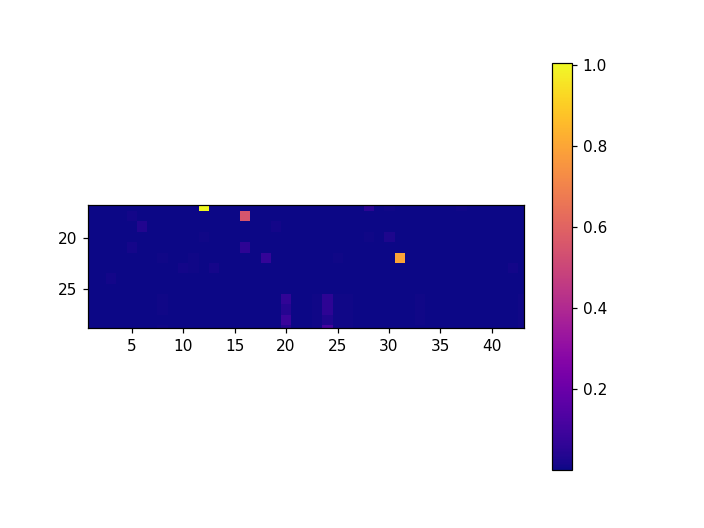

In [122]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(dists, 
           #vmin=0, vmax=10, 
           cmap='plasma')
plt.colorbar()

In [123]:
allowed_drift_th = 3
x_coords, y_coords = np.where(dists > 1/allowed_drift_th)
kept_spots_748, kept_spots_637 = daxp.spots_748[x_coords], daxp.spots_637[y_coords]
daxp.save_filename

'/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5'

'Conv_zscan_001'

<IPython.core.display.Javascript object>


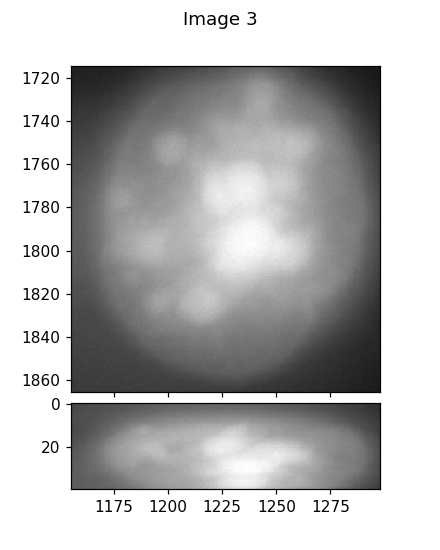

In [107]:
coord_dict = {
    'coords':list(np.concatenate([kept_spots_748.to_coords(), 
                             kept_spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(kept_spots_748))) + list(1 * np.ones(len(kept_spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

In [109]:
from ChromAn.src.file_io.image_crop import crop_neighboring_area

In [112]:
_local_crop = crop_neighboring_area(daxp.im_637, kept_spots_637.to_coords()[10], 3)

In [114]:
_local_crop = crop_neighboring_area(daxp.im_405, kept_spots_637.to_coords()[10], 3)

In [115]:
np.mean(_local_crop)

37047.0

In [135]:
daxp._save_base_to_hdf5()

- use default save filename.
- saving to new file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
filename
inf_filename
off_filename
power_filename
xml_filename
save_filename
correction_folder
channels
-- updated the following basic information: filename,inf_filename,off_filename,power_filename,xml_filename,save_filename,correction_folder,channels


In [ ]:
# run quick segmentation

In [ ]:
%matplotlib notebook
f = plt.figure(dpi=125)
interactive.imshow_mark_3d(
    [getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
    fig=f,
    image_names=daxp.channels, 
    min_max_default=[0,20000],
    )
f.show()

In [ ]:
# generate a new